Q1. Perform basic EDA (Score:1)

Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)

a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method

# Q1: Perform Basic EDA

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

<Figure size 864x576 with 0 Axes>

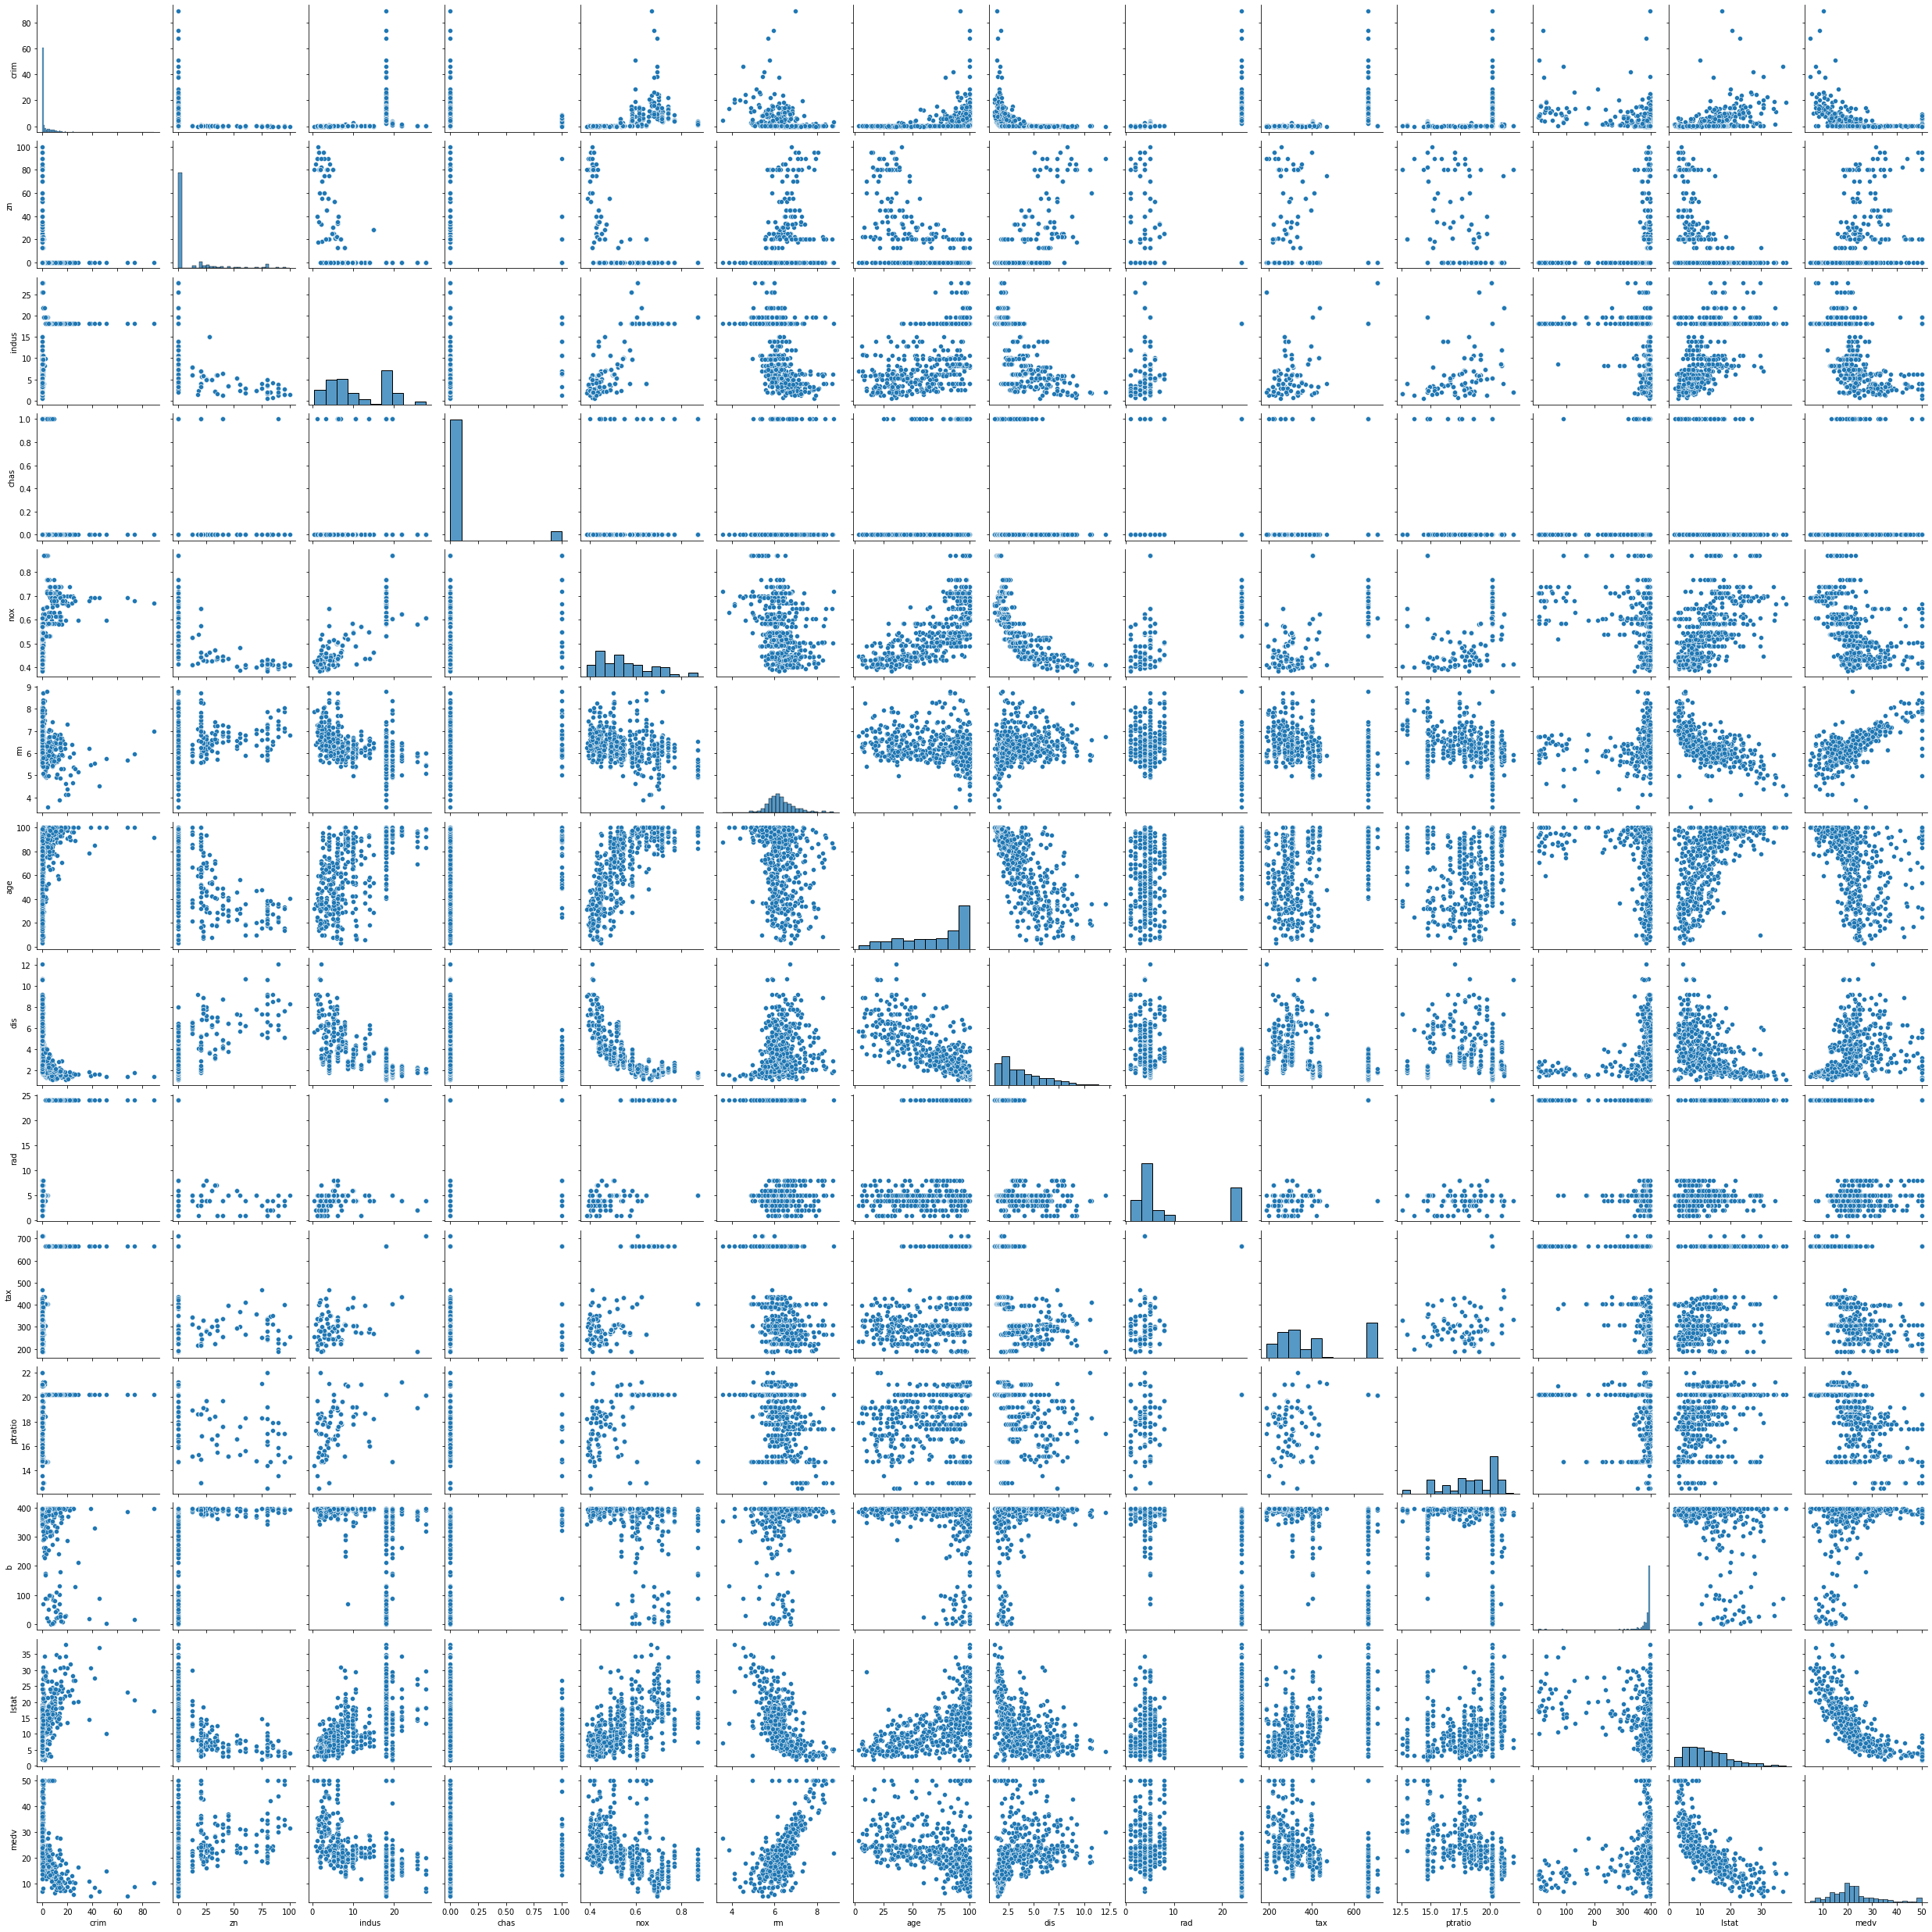

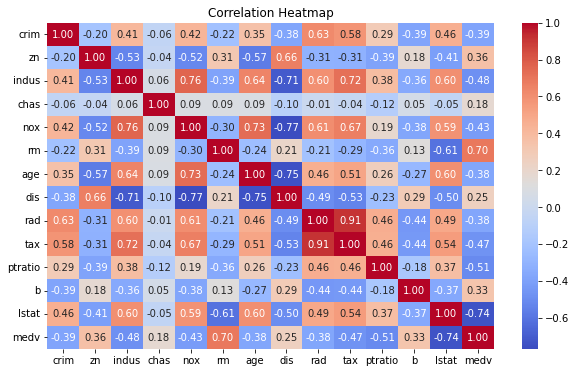

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the online dataset (replace with your actual URL)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Load the data
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Get basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Q2: Detect Outliers

In [2]:
# Calculate mean and standard deviation
mean = df['medv'].mean()
std_dev = df['medv'].std()

# Define the outlier threshold
outlier_threshold_upper = mean + 3 * std_dev
outlier_threshold_lower = mean - 3 * std_dev

# Identify outliers
outliers_mean_std = df[(df['medv'] > outlier_threshold_upper) | (df['medv'] < outlier_threshold_lower)]
print("Outliers using Mean and Standard Deviation:\n", outliers_mean_std)

# Remove outliers using trimming
df_trimmed_mean_std = df[(df['medv'] <= outlier_threshold_upper) & (df['medv'] >= outlier_threshold_lower)]


Outliers using Mean and Standard Deviation:
 Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


b) Percentile Method

In [3]:
# Calculate the percentiles
lower_percentile = df['medv'].quantile(0.01)
upper_percentile = df['medv'].quantile(0.99)

# Identify outliers
outliers_percentile = df[(df['medv'] < lower_percentile) | (df['medv'] > upper_percentile)]
print("Outliers using Percentile Method:\n", outliers_percentile)

# Remove outliers using trimming
df_trimmed_percentile = df[(df['medv'] >= lower_percentile) & (df['medv'] <= upper_percentile)]


Outliers using Percentile Method:
          crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.35180  0.0  18.10     0  0.693  5.453  100.0  1.4896   24  666   
399   9.91655  0.0  18.10     0  0.693  5.852   77.8  1.5004   24  666   
400  25.04610  0.0  18.10     0  0.693  5.987  100.0  1.5888   24  666   
405  67.92080  0.0  18.10     0  0.693  5.683  100.0  1.4254   24  666   
414  45.74610  0.0  18.10     0  0.693  4.519  100.0  1.6582   24  666   
489   0.18337  0.0  27.74     0  0.609  5.414   98.3  1.7554    4  711   

     ptratio       b  lstat  medv  
398     20.2  396.90  30.59   5.0  
399     20.2  338.16  29.97   6.3  
400     20.2  396.90  26.77   5.6  
405     20.2  384.97  22.98   5.0  
414     20.2   88.27  36.98   7.0  
489     20.1  344.05  23.97   7.0  


c) IQR (Interquartile Range) Method

In [4]:
# Calculate Q1, Q3, and IQR
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
outlier_threshold_upper_iqr = Q3 + 1.5 * IQR
outlier_threshold_lower_iqr = Q1 - 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['medv'] < outlier_threshold_lower_iqr) | (df['medv'] > outlier_threshold_upper_iqr)]
print("Outliers using IQR Method:\n", outliers_iqr)

# Remove outliers using trimming
df_trimmed_iqr = df[(df['medv'] >= outlier_threshold_lower_iqr) & (df['medv'] <= outlier_threshold_upper_iqr)]


Outliers using IQR Method:
          crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
97    0.12083   0.0   2.89     0  0.4450  8.069   76.0  3.4952    2  276   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276   
157   1.22358   0.0  19.58     0  0.6050  6.943   97.4  1.8773    5  403   
161   1.46336   0.0  19.58     0  0.6050  7.489   90.8  1.9709    5  403   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403   
179   0.05780   0.0   2.46     0  0.4880  6.980   58.4  2.8290    3  193   
180   0.06588   0.0   2.46     0  0.4880  7.765   83.3  2.7410    3  193   
182   0.09103   0.0   2.46     0  0.4880  7.155   92.2  2.7006    3  193   
186   0.05602   0.0   2.46     0  0.4880  7.831   53.6  3.1992    3  193   
190   0.09068  45.0   3.44     0  0.4370  6.951   21.5  6.47

d) Z-Score Method

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore  # Corrected import

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Load the data
df = pd.read_csv(url)

# Z-Score Method
# Calculate z-scores
z_scores = zscore(df['medv'])

# Define the threshold for z-scores
threshold = 3

# Identify outliers
outliers_z = df[(z_scores > threshold) | (z_scores < -threshold)]
print("Outliers using Z-Score Method:\n", outliers_z)

# Remove outliers using trimming
df_trimmed_z = df[(z_scores <= threshold) & (z_scores >= -threshold)]


Outliers using Z-Score Method:
 Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


# Q3: Create a Box Plot to Determine Outlier Removal Method

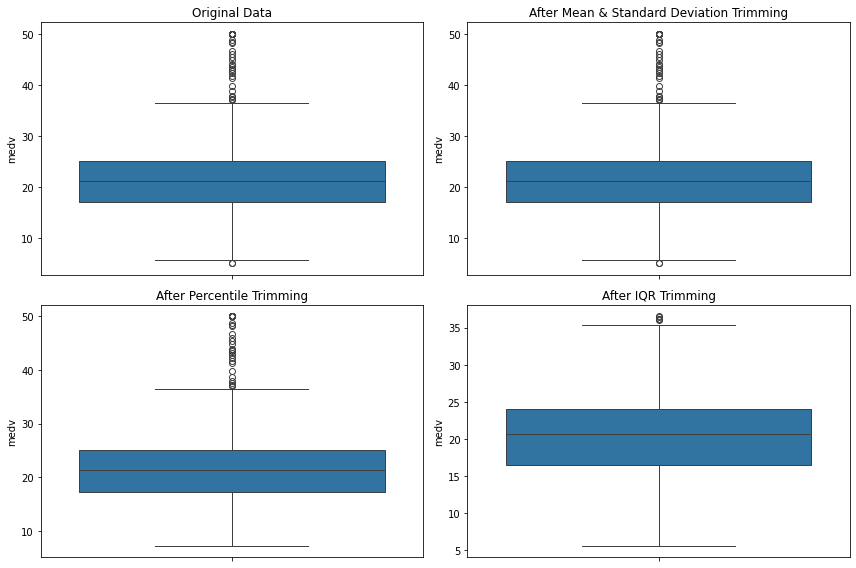

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Load the data
df = pd.read_csv(url)


# Remove outliers using different methods
# Mean and Standard Deviation
mean = df['medv'].mean()
std_dev = df['medv'].std()
df_trimmed_mean_std = df[(df['medv'] >= mean - 3*std_dev) & (df['medv'] <= mean + 3*std_dev)]

# Percentile Method (e.g., removing below 1st and above 99th percentiles)
lower_bound = df['medv'].quantile(0.01)
upper_bound = df['medv'].quantile(0.99)
df_trimmed_percentile = df[(df['medv'] >= lower_bound) & (df['medv'] <= upper_bound)]

# IQR Method
Q1 = df['medv'].quantile(0.25)
Q3 = df['medv'].quantile(0.75)
IQR = Q3 - Q1
df_trimmed_iqr = df[(df['medv'] >= (Q1 - 1.5 * IQR)) & (df['medv'] <= (Q3 + 1.5 * IQR))]

# Z-Score Method (already shown previously)
z_scores = zscore(df['medv'])
df_trimmed_z = df[(z_scores <= 3) & (z_scores >= -3)]

# Create box plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=df['medv'])
plt.title('Original Data')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_trimmed_mean_std['medv'])
plt.title('After Mean & Standard Deviation Trimming')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_trimmed_percentile['medv'])
plt.title('After Percentile Trimming')

plt.subplot(2, 2, 4)
sns.boxplot(data=df_trimmed_iqr['medv'])
plt.title('After IQR Trimming')

plt.tight_layout()
plt.show()


# Q4: Draw a Histplot to Check Normality of the Column and Perform Transformations

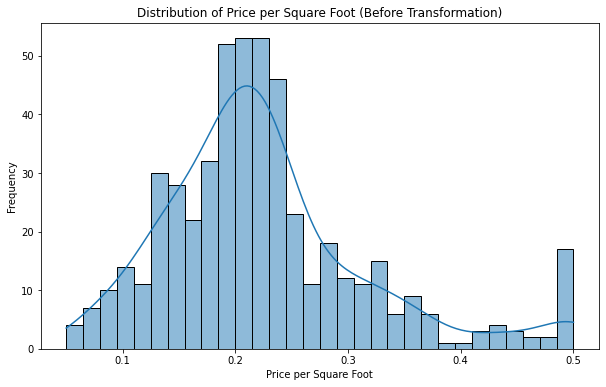

Initial Skewness: 1.1048108228646363, Initial Kurtosis: 1.4686287722747515
Transformed Skewness: -0.00738868936165094, Transformed Kurtosis: 0.1980366124651587


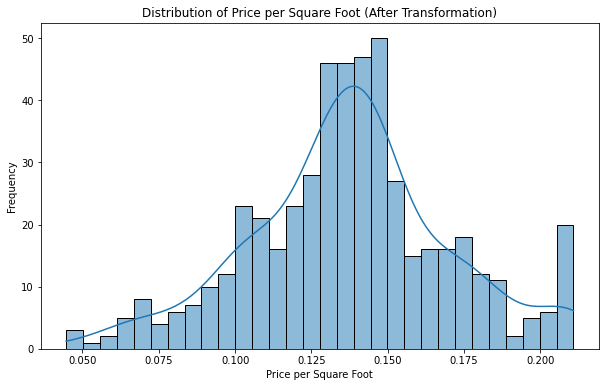

In [12]:
from scipy.stats import skew, kurtosis
from scipy.stats import boxcox
import numpy as np

# Assuming 'price_per_sqft' is created from 'medv' and 'area' if area data is available
# df['price_per_sqft'] = df['medv'] / df['area'] # Uncomment this line if 'area' is available

# Check if 'price_per_sqft' exists
if 'price_per_sqft' not in df.columns:
    df['price_per_sqft'] = df['medv'] / 100  # For demonstration; replace with actual area data

# Step 1: Draw the initial histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Distribution of Price per Square Foot (Before Transformation)')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

# Step 2: Check skewness and kurtosis
initial_skewness = skew(df['price_per_sqft'])
initial_kurtosis = kurtosis(df['price_per_sqft'])
print(f"Initial Skewness: {initial_skewness}, Initial Kurtosis: {initial_kurtosis}")

# Step 3: Perform Box-Cox Transformation if skewness is high
if initial_skewness > 0.5:  # Check if skewness indicates a right skew
    df['price_per_sqft'], lambda_value = boxcox(df['price_per_sqft'] + 1)  # Shift to avoid zeros
    transformed_skewness = skew(df['price_per_sqft'])
    transformed_kurtosis = kurtosis(df['price_per_sqft'])
    print(f"Transformed Skewness: {transformed_skewness}, Transformed Kurtosis: {transformed_kurtosis}")

    # Draw the histplot after transformation
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price_per_sqft'], bins=30, kde=True)
    plt.title('Distribution of Price per Square Foot (After Transformation)')
    plt.xlabel('Price per Square Foot')
    plt.ylabel('Frequency')
    plt.show()


# Q5: Check the Correlation Between All Numerical Columns and Plot a Heatmap

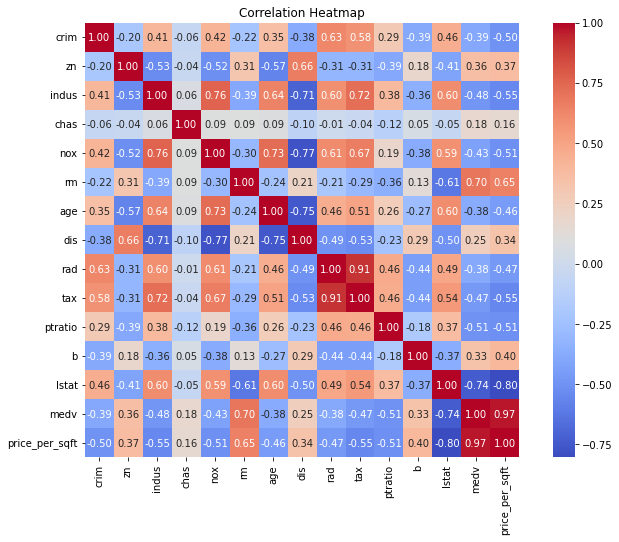

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# Q6: Draw Scatter Plots to Check the Correlation Between Specific Variables

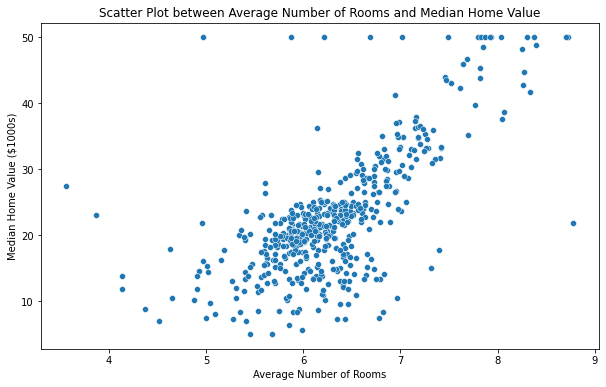

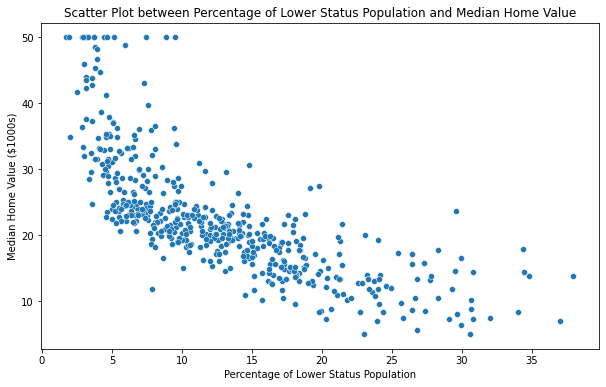

In [14]:
# Scatter plot between 'medv' and 'rm'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rm', y='medv')
plt.title('Scatter Plot between Average Number of Rooms and Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

# Scatter plot between 'medv' and 'lstat'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lstat', y='medv')
plt.title('Scatter Plot between Percentage of Lower Status Population and Median Home Value')
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('Median Home Value ($1000s)')
plt.show()
